In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(color_codes=True)

## Exercise W7.4.3

Simulate 100 observations from a Normal distribution with $\mu$ = 0, $\sigma^2$ = 1

In [3]:
# Set random seed for repeatability of experiment
np.random.seed(50)

# Set parameters for population
popMean = 0
popStdDev = 1

# Generate empirical observations of X~N(0,1)
Xobs = np.random.normal(popMean, popStdDev, 100)

list(Xobs[0:5])

[-1.5603521086836527,
 -0.030977603473707687,
 -0.62092842388046798,
 -1.4645804852016084,
 1.4119461217868716]

In [4]:
Prob = np.linspace(0.025, 0.975, 100)
list(Prob[0:5])

[0.025000000000000001,
 0.034595959595959597,
 0.044191919191919192,
 0.053787878787878787,
 0.063383838383838376]

In [5]:
# Sort empirical observations of X
XobsSort = np.sort(Xobs)
list(XobsSort[0:5])

[-3.8098903778515631,
 -2.5709197609296757,
 -2.3734533786234433,
 -1.6663521707928519,
 -1.5878848393247715]

In [6]:
# Calculate the empirical mean and standard deviation of observations
empMean = np.mean(XobsSort)
empStdDev = np.std(XobsSort)
empMin = min(XobsSort)
empMax = max(XobsSort)
empMean, empStdDev, empMin, empMax

(0.040041158721121163,
 1.0762778842617999,
 -3.8098903778515631,
 3.3140753455120797)

In [7]:
# Calculate standard error (i.e. sigma divided by square root of n)
popStdErr = popStdDev / np.sqrt(len(XobsSort))
popStdErr

0.10000000000000001

In [8]:
# Calculate actual CDF of Normal(0,1)
actualNorm = scipy.stats.norm.ppf(Prob)

Calculate confidence bounds for empirical distribution

In [9]:
# set z-statistic for 95% bound
zStat = 1.96

# Calculate confidence bounds (Lower and Upper) for empirical distribution
empDistLower = XobsSort - zStat * popStdErr
empDistUpper = XobsSort + zStat * popStdErr

In [10]:
# Calculate upper and lower means based empirical distribution
empLowerMean = np.mean(empDistLower)
empUpperMean = np.mean(empDistUpper)

empLowerMean, empUpperMean

(-0.15595884127887882, 0.23604115872112119)

In [11]:

## Define x-range for plotting, evenly spaced x-values between the minimum and maximum
Xmin = min(XobsSort)
Xmax = max(XobsSort)

Xlen = len(XobsSort)

Xrange = np.linspace(Xmin, Xmax, Xlen)


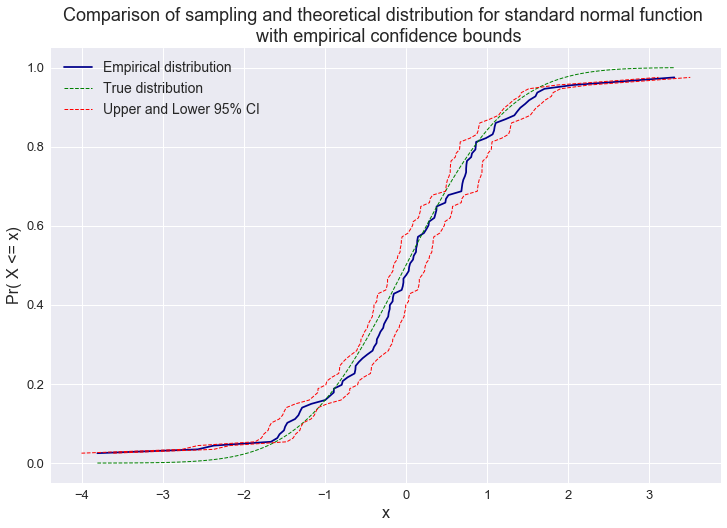

In [12]:
plt.figure(figsize=(12,8))
plt.plot(XobsSort, Prob, '-', c='darkblue', label ='Empirical distribution');
plt.plot(Xrange, scipy.stats.norm.cdf(Xrange, popMean, popStdDev), '--', c='green', lw=1, label ='True distribution');
#plt.plot(actualNorm, Prob, '--', c='green', lw=0.6);
plt.plot(empDistLower, Prob, '--', c='red', lw=1, label ='Upper and Lower 95% CI');
plt.plot(empDistUpper, Prob, '--', c='red', lw=1);
plt.title('Comparison of sampling and theoretical distribution for standard normal function \n with empirical confidence bounds', fontsize = 18)
plt.xlabel('x', fontsize = 16)
plt.ylabel('Pr( X <= x)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

**Figure 1:** Plot shows empirical distribution generated from 100 randomly drawn observations from Normal distribution with $\mu$ = 0, and $\sigma$ = 1. This is supported by confidence bands in red. 

A plot of the actual distribution is also drawn, and it is evident the actual distribution is broadly approximated by the empirical distribution.

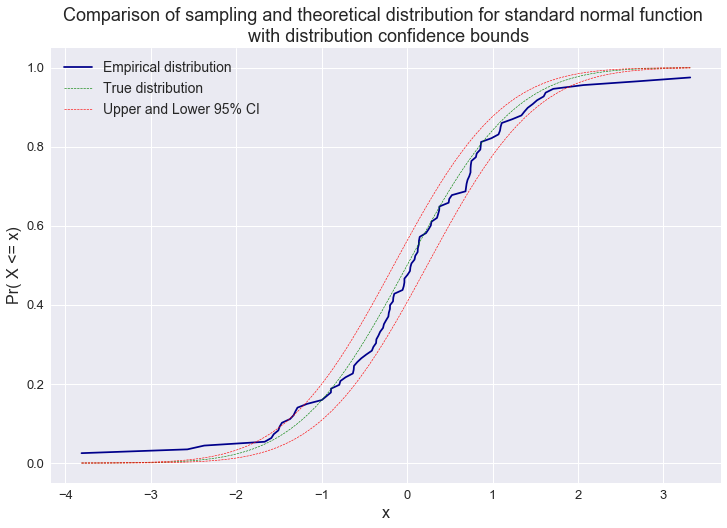

In [13]:


plt.figure(figsize=(12,8))
plt.plot(XobsSort, Prob, '-', c='darkblue', label ='Empirical distribution');
plt.plot(Xrange, scipy.stats.norm.cdf(Xrange, popMean, popStdDev), '--', c='green', lw=0.6, label ='True distribution');



#plt.plot(actualNorm, Prob, '--', c='green', lw=0.6);
plt.plot(Xrange, scipy.stats.norm.cdf(Xrange, empLowerMean, popStdDev), '--', c='red', lw=0.6, label ='Upper and Lower 95% CI');
plt.plot(Xrange, scipy.stats.norm.cdf(Xrange, empUpperMean, popStdDev), '--', c='red', lw=0.6);
plt.title('Comparison of sampling and theoretical distribution for standard normal function \n with distribution confidence bounds', fontsize = 18)
plt.xlabel('x', fontsize = 16)
plt.ylabel('Pr( X <= x)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

**Figure 2:** Plot shows empirical distribution generated from 100 randomly drawn observations from Normal distribution with $\mu$ = 0, and $\sigma$ = 1. 

A plot of the actual distribution is also drawn ins green, and supported by relevant confidence bounds in red. The empirical distribution can be used as a reasonable approximation for the actual distribution (e.g. in some cases we won't know the actual distribution).

In [14]:
# Calculate theoretical x-values to compare ordered emprical distribution
Xactual = scipy.stats.norm.ppf(Prob)

#Number of observations of empirical distribution between two confidence bounds
len(XobsSort[((Xactual - zStat * popStdErr) < XobsSort) & (XobsSort < (Xactual + zStat * popStdErr))])



92

### Simulation

Put this all together in a for loop to simulate this experiment 1,000 times for a Normal distribution with $\mu$ = 0 and $\sigma$ = 1

In [15]:
#Store number of empirical observations between bounds in array 'record'
record = []

simNumber = 1000

for i in range(simNumber):
    
    # Generate empirical observations of X~N(0,1)
    Xobs = np.random.normal(popMean, popStdDev, 100)
    
    # Sort empirical observations of X
    XobsSort = np.sort(Xobs)
    
    #Compare number of observations of empirical distribution between two confidence bounds (upper and lower for Xactual)
    withinBounds = len(XobsSort[((Xactual - zStat * popStdErr) < XobsSort) & (XobsSort < (Xactual + zStat * popStdErr))])

    #add count of observations within bounds into record array
    record.append(withinBounds)

   

In [16]:
# Print 'record' list of number of successes from the 1,000 trials    
np.array(record)

array([ 33,  96, 100,  51,  88,  93,  74,  62,  91,  78,  70,  83,  93,
        38,  96,  69,  97,  25,  94,  84,  94,  97,  87,  80,  86,  86,
        90,  43,  83,  71,  90,  56,  74,  32,  99,  91,  76,  65,  78,
        65,  68,  94,  44,  67,  90,  89,  85,  81,  61,  88,  66,  89,
        76,  59,  97,  82,  90,  88,  88,  93,  68,  96,  93,  73,  77,
        61,  88,  77,  65,  85,  94,  87,  97,  78,  90,  85,  69,  78,
        25,  97,  62,  87,  88,  85,  75,  99,  79,  99,  91,  88,  90,
        84,  93,  62,  78,  80,  66,  67,  98,  59,  55,  71,  69,  93,
        86,  86,  48,  78,  82,  10,  91,  77,  86,  78,  95,  89,  43,
        76,  55,  87,  95,  83,  89,  85,  88,  30,  77,  62,  76,  88,
        66,  85,  97, 100,  87,  89,  53,  93,  93,  89,  96,  77,  84,
        90,  94,  84,  82,  95,  91, 100,  84,  77,  65,  66,  93,  21,
        97,  88,  83,  99,  73,  85,  80,  36,  91,  72,  75,  85,  61,
        90,  46,  81,  83,  86,  74,  72,  93,  38,  85,  80,  6

In [17]:
np.mean(record)

77.484999999999999

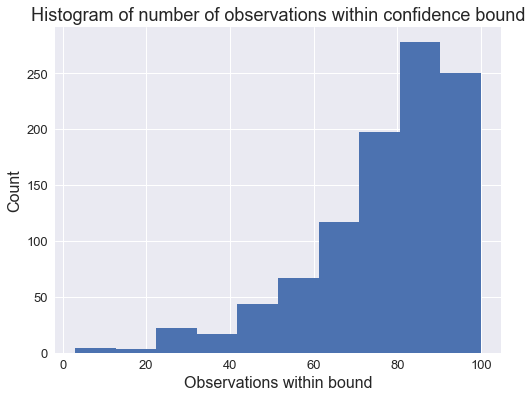

In [18]:
plt.figure(figsize=(8,6))
plt.hist(record);
plt.title('Histogram of number of observations within confidence bound', fontsize = 18)
plt.xlabel('Observations within bound', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

### Cauchy distribution

Can you repeat the last simulation part for the **Cauchy distribution.**

Sample code needed below.

In [19]:

# Calculate theoretical x-values for Cauchy distribution to compare ordered emprical distribution
Xactual = scipy.stats.cauchy.ppf(Prob)

In [20]:
#Store number of empirical observations between bounds in array 'record'
record = []

simNumber = 1000

for i in range(simNumber):
    
    # Generate empirical observations of X~N(0,1)
    Xobs = np.random.standard_cauchy(100)
    
    # Sort empirical observations of X
    XobsSort = np.sort(Xobs)
    
    #Compare number of observations of empirical distribution between two confidence bounds (upper and lower for Xactual)
    withinBounds = len(XobsSort[((Xactual - zStat * popStdErr) < XobsSort) & (XobsSort < (Xactual + zStat * popStdErr))])

    #add count of observations within bounds into record array
    record.append(withinBounds)

Complete the remaining part to obtain a mean an histogram of number of observations within confidence intervals.

In [21]:
## Your code here

## Exercise W7.4.8

In [22]:
#Link to the data on this github address
## It's a dataset built in to R (the program), publicly available sample dataset
### In general, don't randomly download datasets from the web. Make some assessment of reliability for your purposes
#### (this link looks fine for us trying to illustrate a concept, although keep in mind the data may be sample / illustrative)
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/faithful.csv'


In [23]:
faithful = pd.read_csv(url, index_col=0)

In [24]:
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [25]:
wt = np.mean(faithful.waiting)
sigma = np.std(faithful.waiting)
wtMed = np.median(faithful.waiting)
obslen = len(faithful.waiting)
wt, sigma, wtMed, obslen

(70.8970588235294, 13.569960017586368, 76.0, 272)

In [26]:
zStat = 1.645
Lower = round(wt - zStat * sigma / len(faithful.waiting), 2)
Upper = round(wt + zStat * sigma / len(faithful.waiting), 2)

print("The 90% confidence interval of the wait time for old faithful geyser eruptions is between " +
      "{} and {} minutes".format(Lower, Upper) + "\n")

print("Estimate for the median waiting time is sample median {} ".format(wtMed))



The 90% confidence interval of the wait time for old faithful geyser eruptions is between 70.81 and 70.98 minutes

Estimate for the median waiting time is sample median 76.0 


## Exercise W7.4.9

We are undertaking a hypothesis test and calculating the difference proportions.

A referenced similar example for **Distribution of the Difference Between two Proportions** can be found [here](http://www.kean.edu/~fosborne/bstat/05d2pops.html)


In [27]:
p1 = 0.9
p2 = 0.85
n1 = 100
n2 = 100

## Calculate estimate and standard error
estPP = p1 - p2
sigmaPP = np.sqrt(p1*(1 - p1) / n1 + p2*(1 - p2) / n2)
estPP, sigmaPP 


(0.050000000000000044, 0.046636895265444074)

In [28]:
# Calculate zStat for 80 and 95% confidence intervals
zStat80 = -1 * scipy.stats.norm.ppf(0.1)
zStat95 = -1 * scipy.stats.norm.ppf(0.025)
zStat80, zStat95 

(1.2815515655446004, 1.9599639845400545)

In [31]:
## Calculate lower and upper bounds for 80% and 95% confidence intervals

Lower80 = round(estPP - zStat80 * sigmaPP, 4) * 100
Upper80 = round(estPP + zStat80 * sigmaPP, 4) * 100

Lower95 = round(estPP - zStat95 * sigmaPP, 4) * 100
Upper95 = round(estPP + zStat95 * sigmaPP, 4) * 100

print("The estimate and standard effor for effect size is " +
      "{}% and {}% ".format(round(estPP,4)*100, round(sigmaPP,4)*100) + "\n")

print("The 80% confidence interval for difference in proportions (effect size) is  " +
      "{}% and {}% ".format(Lower80, Upper80) + "\n")

print("The 95% confidence interval for difference in proportions (effect size) is  " +
      "{}% and {}% ".format(Lower95, Upper95) + "\n")


The estimate and standard effor for effect size is 5.0% and 4.66% 

The 80% confidence interval for difference in proportions (effect size) is  -0.98% and 10.98% 

The 95% confidence interval for difference in proportions (effect size) is  -4.14% and 14.14% 

